# RANDOM FOREST

In [1]:
import pandas as pd

X = pd.read_csv('features_set.csv')
y = pd.read_csv('classes_set.csv')

In [2]:
y = y.drop(columns=['Unnamed: 0'])
X = X.drop(columns=['Unnamed: 0'])
y = y.astype(int)
X = X/255.

Splitting training e tesing set

In [3]:
#attenzione, ho preso pochi varoli
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, shuffle=True)

In [5]:
X_cv = X_train.head(10000)
y_cv = y_train.head(10000)

Cross Validation

In [8]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [50, 70, 100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs=5,verbose = 3)

start = time.time()
grid_search.fit(X_cv, y_cv)
end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")
print ("Best Score: {:.3f}".format(grid_search.best_score_) )
print ("Best Params: ", grid_search.best_params_)

Fitting 10 folds for each of 55 candidates, totalling 550 fits


C:\Users\victo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The time of execution of above program is : 1141.9069108963013 s
Best Score: 0.952
Best Params:  {'max_depth': 40, 'n_estimators': 300}


Fit:

In [5]:
import time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
rf = RandomForestClassifier(n_estimators = 300, max_depth = 100)  
rf.fit( X_train, y_train)
end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")

<ipython-input-5-20b5d4dcc82e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit( X_train, y_train)


The time of execution of above program is : 222.8837251663208 s


Predict on Training Set:

In [6]:
import time
from sklearn.metrics import accuracy_score
# compute accuracy
start = time.time()
y_pred = rf.predict( X_train )
end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")
acc = accuracy_score(y_true=y_train, y_pred=y_pred)
print ("on test Accuracy {:.3f}".format(acc) )

The time of execution of above program is : 11.381270170211792 s
on test Accuracy 1.000


Predict on Testing Set:

In [10]:
import time
from sklearn.metrics import accuracy_score
# compute accuracy
start = time.time()
y_pred = rf.predict( X_test )
end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print ("on test Accuracy {:.3f}".format(acc) )


The time of execution of above program is : 1.2907047271728516 s
on test Accuracy 0.968


Below we visualize test samples and show their predicted digit value in the title.

In [17]:
from PIL import Image
from matplotlib import cm

def print_image(image):
    myarray = np.reshape(image.to_numpy(), (28,28))
    im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
    width, height = im.size
    new_width  = 300
    new_height = new_width * height / width 
    new_height = 300
    new_width  = new_height * width / height
    img = im.resize((int(new_width), int(new_height)), Image.ANTIALIAS)
    return img

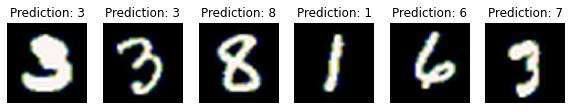

In [18]:
import matplotlib.pyplot as plt
import numpy as np
n = 6
_, axes = plt.subplots(nrows=1, ncols=n, figsize=(10, 3))
for ax, i, i in zip(axes, range(n), range(n)):
    ax.set_axis_off()
    image = print_image(X_test.iloc[i+600])
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {y_pred[i+600]}")

In [13]:
         
def missclassify(y_pred, y_test):
    indexes = []
    i = 0
    y = y_test.to_numpy()
    for row in y: 
        if(y_pred[i]!=row):
            indexes.append(i)
        i +=1
    return indexes


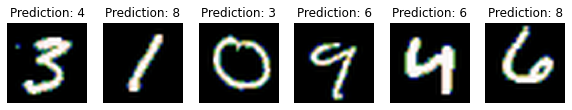

In [14]:
list = missclassify(y_pred, y_test)
n = 6 
_, axes = plt.subplots(nrows=1, ncols=n, figsize=(10, 3)) 
for ax, i, i in zip(axes, list, list): 
    ax.set_axis_off() 
    image = print_image(X.iloc[i]) 
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") 
    ax.set_title(f"Prediction: {y_pred[i]}")

Confusion Matrix

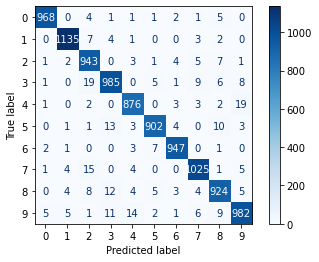

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=sorted((y['class'].unique())))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=sorted((y['class'].unique())),
                             )
disp.plot(cmap=plt.cm.Blues)

plt.show()